# Wheelchair Control

![](images/wheelchair.jpg)

### Python Dependencies

In [101]:
import numpy  as np
from numpy.linalg import *

from scipy.linalg import *
from scipy.integrate import *
from scipy.signal import *
from numpy.linalg import *

from matplotlib.pyplot import *

Step 1 - Wheelchair Planar Model
================================

### Introduction

We consider a simple model of a wheelchair evolving in the plane. It is mainly made of

  - A frame ; from above, its most visible component is the seat. We assume that it is a square,

  - Two fixed wheels (their orientation with respect to the frame does not change). 
    They are parallel and located at opposite ends of the seat. 
    x
We assume that the seat backrest is on top of the wheels common axis.


Let $(0, e_x, e_y)$ be a direct orthonormal frame of the plane. We denote 

  - $(x, y)$ the coordinates of the wheel axis center in the orthonormal and 
  - $\theta$ the angle of the wheels direction with respect to vector $e_x$ ; with $\theta = 0$ when the front of the wheelchait faces the right ($e_x$) and $\theta = \pi/2$ when it faces upwards ($e_y$).

  - $\phi_l$ and $\phi_r$ the rotation angles of the left and right wheel respectively ; by convention, when these angles increase, the wheelchair moves forward.

### Parameter Definition

From now on, we assume that the seat side length is $L = 50 \mbox{ cm}$ and the wheel radius is $R_w = 30 \mbox{ cm}$.

🧩 Define the corresponding Python variables `L` and `Rw` (express every length in meters, and more generally in the sequel, always use the [international standard of units](https://en.wikipedia.org/wiki/SI_derived_unit)) for numerical values. 

In [102]:
L = 0.5  # meters
Rw = 0.3  # meters

### Graphical Representation

🧩 Implement a function `draw_wheelchair` with arguments `x`, `y` and `theta` that draws a simple geometric model of the wheelchair (with seat and fixed wheels) in the plane (top view) for arbitrary values of $(x, y)$ and $\theta$. 

🗝️ **Hint.** Use the function `plot` of `matplotlib.pyplot`.

In [103]:
import numpy as np
from matplotlib import pyplot as plt, patches


def draw_wheelchair(x, y, theta):
    x1 = x + np.sin(theta)*L/2
    y1 = y - np.cos(theta)*L/2
    x2 = x - np.sin(theta)*L/2
    y2 = y + np.cos(theta)*L/2
    x1_ = np.linspace(x1-np.cos(theta)*Rw, x1+np.cos(theta)*Rw, 100)
    y1_ = np.linspace(y1-np.sin(theta)*Rw, y1+np.sin(theta)*Rw, 100)
    plt.plot(x1_, y1_, 'g')
    x2_ = np.linspace(x2-np.cos(theta)*Rw, x2+np.cos(theta)*Rw, 100)
    y2_ = np.linspace(y2-np.sin(theta)*Rw, y2+np.sin(theta)*Rw, 100)
    plt.plot(x2_, y2_, 'g')
    rectangle = patches.Rectangle((x1, y1), L, L, linewidth=2, angle=theta*180/np.pi)
    plt.gca().add_patch(rectangle)






🧩 Represent the wheelchair when $(x, y, \theta) = (0, 0, 0), (2, 2, \pi/2), (0, 4, \pi), (-2, 2, 3\pi/2)$.

🗝️ **Hint.** Use the following `draw_arena` function beforehand.

In [104]:
def draw_arena(x_min=-5, x_max=5, y_min=-5, y_max=5):
    wh_ratio = (x_max - x_min) / (y_max - y_min)
    fig_width, fig_height = 16, 16 / wh_ratio
    plt.figure(figsize=(fig_width, fig_height))
    axes = plt.gca()
    axes.axis([x_min, x_max, y_min, y_max])
    axes.set_aspect(1)
    plt.xticks(np.arange(x_min, x_max+1, 1))
    plt.yticks(np.arange(y_min, y_max+1, 1))
    plt.grid(True)
    

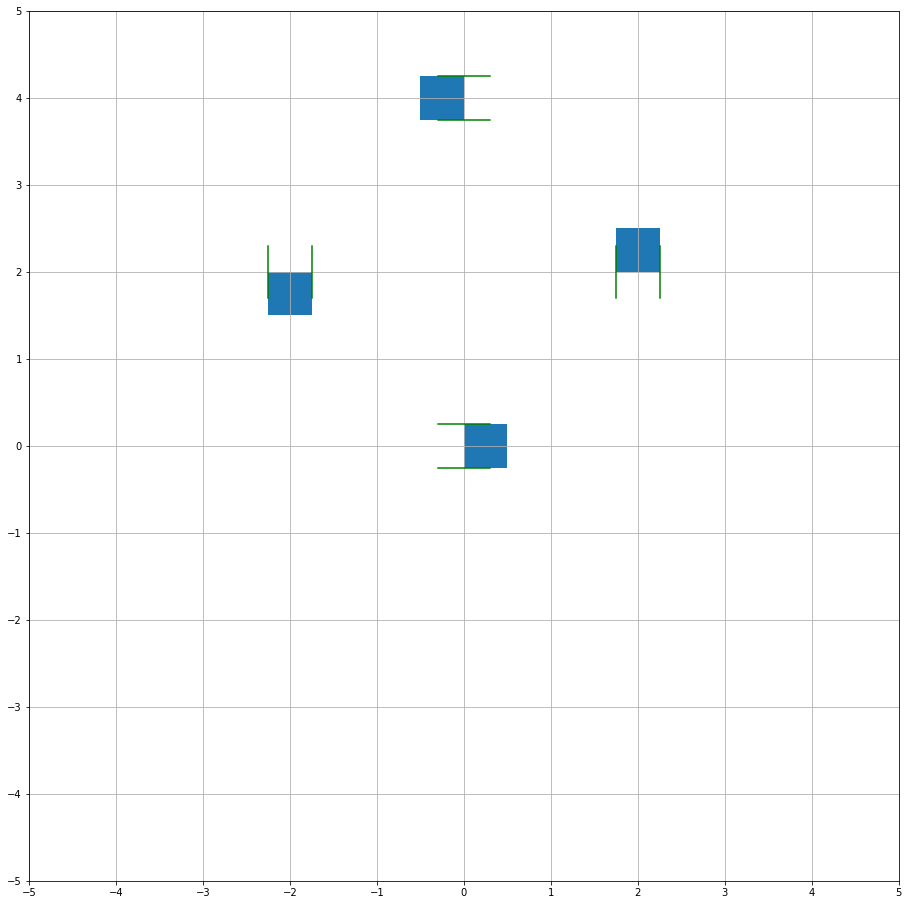

In [105]:
draw_arena()
draw_wheelchair(0,0,0)
draw_wheelchair(2, 2, np.pi/2)
draw_wheelchair(0, 4, np.pi)
draw_wheelchair(-2, 2, 3*np.pi/2)


### Kinematic Modeling

We assume that we can control the wheels angular velocities $\omega_l = \dot{\phi}_l$ and $\omega_r = \dot{\phi}_r$ (this is a *kinematic* model of the wheelchair).
We also assume that the wheelchair fixed wheels roll without slipping. 

🧩 Establish the differential equations that relate $\dot{x}$,
$\dot{y}$ and $\dot{\theta}$ with $\omega_l$ and $\omega_r$.

**Answer:**

### Analysis

🧩 Show that if $\omega_l$ and $\omega_r$ are continuously differentiable functions of $(x, y, \theta)$ (which includes the case of constant inputs), this system is well-posed.

**Answer:**

🧩 Show that if $\omega_l$ and $\omega_r$ are constants, the maximal solution associated to any initial state is global. Is is still true of $\omega_l$ and $\omega_r$ are arbitrary continuously differentiable functions of $(x, y, \theta)$ ?

**Answer:**

### Vector Field

In the sequel, `omega` is a function that computes the input vector $\omega := (\omega_l, \omega_r)$ given the time $t$ and $(x, y, \theta)$ (thus, it may depend on the time and/or on the system state if needed). For example:

In [106]:
def omega(t, xytheta):
    omega_l = (1 - L/4) * pi / Rw
    omega_r = (1 + L/4) * pi / Rw
    return np.array([omega_l, omega_r])


🧩 Implement a function `fun(t, xytheta)` that computes $(\dot{x}, \dot{y}, \dot{\theta})$ given the time $t$ and $(x,y,\theta)$ (and implicitly the inputs $\omega$ computed by the function `omega`).

In [107]:
def fun(t, xytheta):
    x, y, theta = xytheta
    omega_l, omega_r = omega(t, xytheta)
    dx = Rw * 0.5 * (omega_l + omega_r) * cos(theta)
    dy = Rw * 0.5 * (omega_l + omega_r) * sin(theta)
    dtheta = Rw * (omega_r - omega_l) / L
    return np.array([dx, dy, dtheta])


### Simulation Setup

🧩 Simulate the wheelchair dynamics for 4 seconds when $(x_0, y_0, \theta_0)(t=0) = (0.0, 0.0, 0.0)$,
and the wheels velocities are the constants $\omega_l = (1 - L/4)  \pi / R \mbox{ rad/s}$ and $\omega_r = (1 + L/4)  \pi / R_w \mbox{ rad/s}$.
(Compute the dense outputs.)
   

In [108]:
initial_conditions = np.array([0.0, 0.0, 0.0])
time_span = (0.0, 4.0)
solv = solve_ivp(fun=fun, t_span=time_span, y0=initial_conditions, dense_output=True)

🧩 Use the simulation results to draw the graphs of $x(t)$, $y(t)$ and $\theta(t)$.

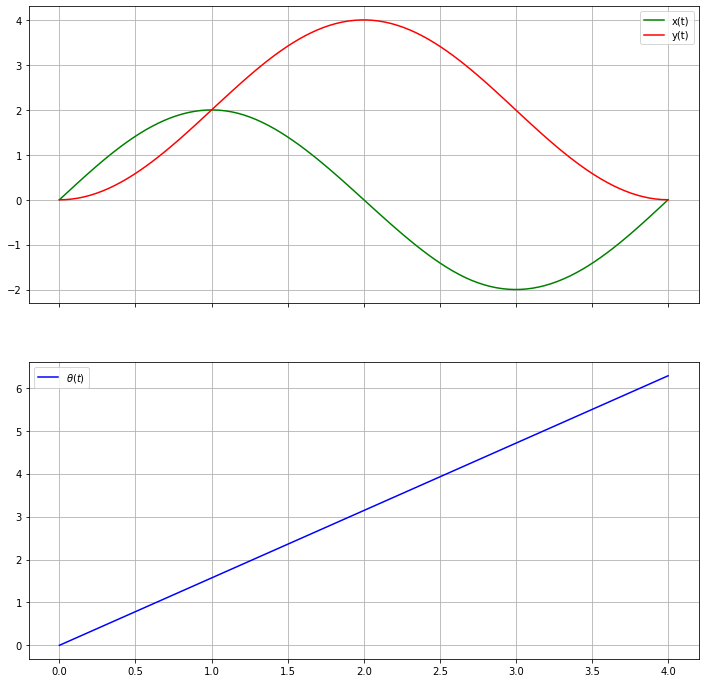

In [109]:
t = np.linspace(0.0, 4.0, 100)
x, y, theta = solv["sol"](t)
fig = plt.figure(figsize=(12, 12))
ax1, ax2 = fig.subplots(2, 1, sharex=True)
ax1.grid(True)
ax1.plot(t, x,color='green', label="x(t)")
ax1.plot(t, y,color='red',label="y(t)")
ax1.legend()
ax2.grid(True)
ax2.plot(t, theta,color='blue',label=r"$\theta(t)$")
ax2.legend()

🧩 Use the simulation results to display the robot location every 0.5 second.

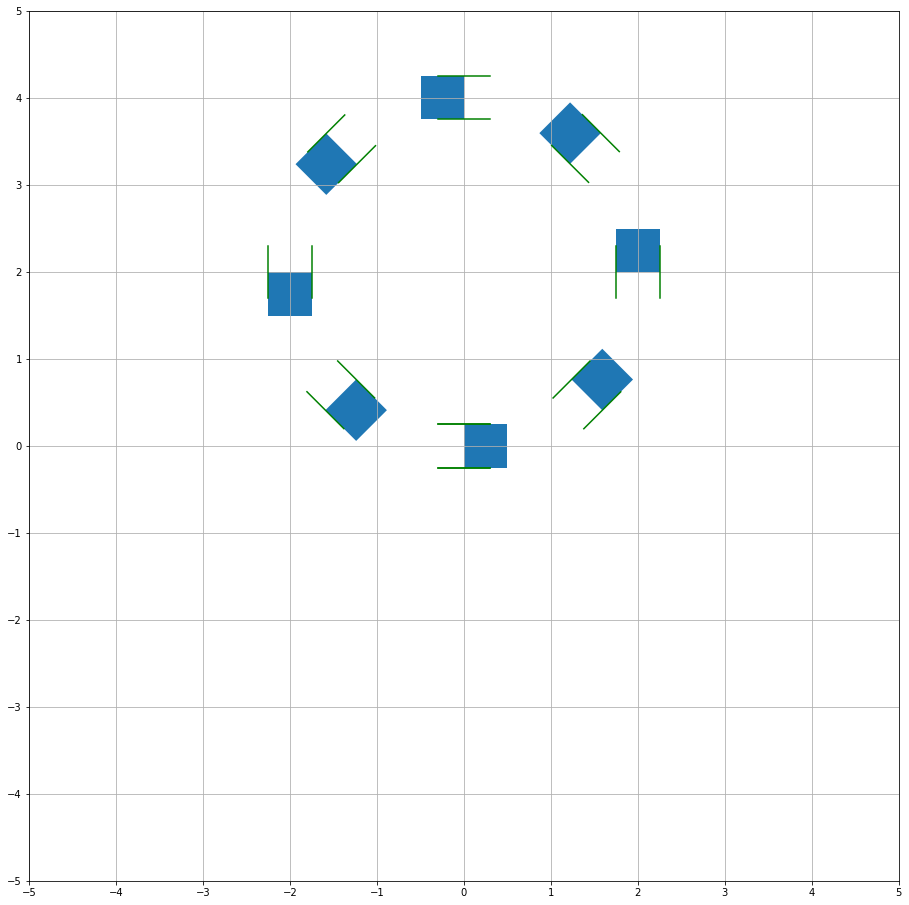

In [110]:
draw_arena()
t = np.linspace(0.0, 4.0, 9)
solution = solv["sol"](t)
for x, y, theta in solution.T:
    draw_wheelchair(x, y, theta)

🧩 What should be the analytical expression of $x(t)$, $y(t)$ and $\theta(t)$? 

**Answer:**

🧩 Do you experimental results match the theoretical results ? Draw the curves of the simulation error at time $t$ for $x$, $y$ and $\theta$.

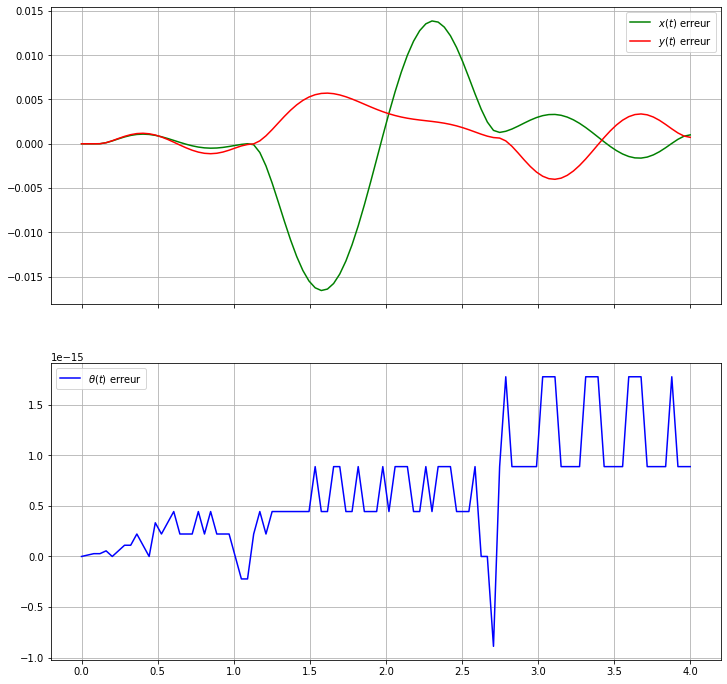

In [111]:
t = np.linspace(0.0, 4.0, 100)
sol = solv["sol"]
x, y, theta = sol(t)
x_err = x - 2 * np.sin(np.pi * t / 2)
y_err = y + 2 * np.cos(np.pi * t / 2) - 2
theta_err = theta - (np.pi / 2) * t
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))

ax1.plot(t, x_err,color='green', label="$x(t)$ erreur")
ax1.plot(t, y_err,color='red', label="$y(t)$ erreur")
ax1.legend()
ax1.grid(True)

ax2.plot(t, theta_err,color='blue', label=r"$\theta(t)$ erreur")
ax2.legend()
ax2.grid(True)

plt.show()


🧩 If needed, adjust the simulation parameters until this error is uniformly less than $2 \times 10^{-5}$ for every component of $(x, y, \theta)$.

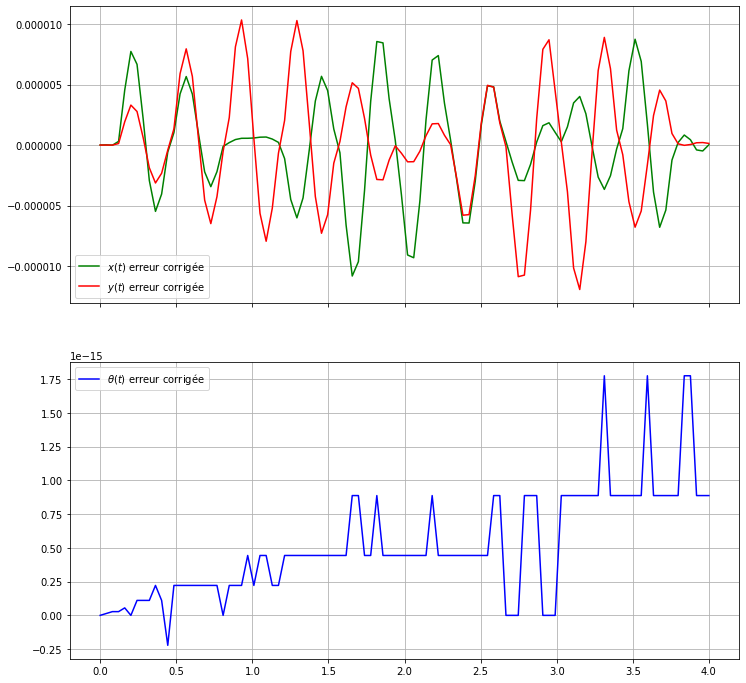

In [112]:
r = solve_ivp(fun=fun, t_span=(0.0, 4.0), y0=[0.0, 0.0, 0.0], rtol=2e-7, dense_output=True)
t = np.linspace(0.0, 4.0, 100)
xt, yt, thetat = r.sol(t)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 12))
ax1.grid(True)
ax2.grid(True)
ax1.plot(t, xt - 2*np.sin(np.pi*t/2), color='green',label="$x(t)$ erreur corrigée")
ax1.plot(t, yt + 2*np.cos(np.pi*t/2) - 2,color='red' ,label="$y(t)$ erreur corrigée")
ax1.legend()
ax2.plot(t, thetat - (np.pi/2)*t,color='blue' ,label=r"$\theta(t)$ erreur corrigée")
ax2.legend()
plt.show()
